In [1]:
import ultralytics
from ultralytics import YOLO
import os
import math
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt
import numpy as np

import board.corners as corners
import board.grid as grid

import warnings
warnings.filterwarnings("ignore")

In [2]:
pieces_model = YOLO('models/pieces_large.pt')




image 1/1 c:\Users\Gebruiker\Desktop\School\Extended Reality\ChessAR_final\ChessAR\images\warped_image.jpg: 640x640 2 black_bisshops, 1 black_king, 2 black_knights, 8 black_pawns, 1 black_queen, 2 black_rooks, 2 white_bisshops, 2 white_kings, 2 white_knights, 8 white_pawns, 1 white_queen, 3 white_rooks, 40.0ms
Speed: 5.0ms preprocess, 40.0ms inference, 1537.0ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'black_bisshop', 1: 'black_king', 2: 'black_knight', 3: 'black_pawn', 4: 'black_queen', 5: 'black_rook', 6: 'white_bisshop', 7: 'white_king', 8: 'white_knight', 9: 'white_pawn', 10: 'white_queen', 11: 'white_rook'}
obb: None
orig_img: array([[[133, 150, 163],
        [139, 156, 169],
        [144, 161, 174],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[134, 151, 164],
        [139, 1

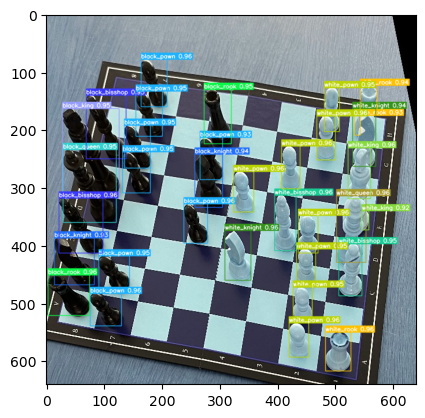

In [3]:
image_path = "images/warped_image.jpg"

# predict chess pieces from image
results = pieces_model.predict(image_path, conf=0.7, iou=0.3)
print(results)
prediction = results[0].plot(line_width=1, font_size=10)
plt.imshow(prediction)
plt.show()


In [4]:
# # Load the video
# video_path = "images/video.mp4"
# cap = cv2.VideoCapture(video_path)

# # Define the codec and create a VideoWriter object to save the output video
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Save the current frame to a temporary file
#     temp_frame_path = "temp_frame.jpg"
#     cv2.imwrite(temp_frame_path, frame)

#     # Perform object detection on the current frame
#     results = pieces_model.predict(temp_frame_path, conf=0.7, iou=0.3)
#     prediction = results[0].plot(line_width=1, font_size=10)

#     # Convert the prediction (Matplotlib plot) back to an image
#     prediction_rgb = cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)

#     # Write the frame with the detection boxes to the output video
#     out.write(prediction_rgb)

#     # Optionally, display the frame
#     # cv2.imshow('Frame', prediction_rgb)
#     # if cv2.waitKey(1) & 0xFF == ord('q'):
#     #     break

# # Release everything if the job is finished
# cap.release()
# out.release()
# cv2.destroyAllWindows()

Test FEN generation

In [5]:
# empty board
board = [['' for _ in range(8)] for _ in range(8)]

# placeholder pieces:
pieces = [
    [(100, 50), 'r'], [(200, 50), 'n'], [(300, 50), 'b'], [(400, 50), 'q'], [(500, 50), 'k'], [(600, 50), 'b'],
    [(100, 150), 'p'], [(200, 150), 'p'], [(300, 150), 'p'], [(400, 150), 'p'], [(500, 150), 'p'], [(600, 150), 'p'],
    [(100, 250), 'P'], [(200, 250), 'P'], [(300, 250), 'P'], [(400, 250), 'P'], [(500, 250), 'P'], [(600, 250), 'P'],
    [(100, 350), 'R'], [(200, 350), 'N'], [(300, 350), 'B'], [(400, 350), 'Q'], [(500, 350), 'K'], [(600, 350), 'B']
]

grid.place_pieces_on_board(board, pieces)
fen_notation = grid.generate_fen(board)
print("FEN Notation:", fen_notation)



FEN Notation: 1rnbq1kb/1pppp1pp/8/1PPPP1PP/1RNBQ1KB/8/8/8
